# Ishan Project

In [1]:
# Library to suppress warnings
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

# Load the CSV file
file_path = r'D:\Dev\Projects\R\train.csv'
mobile_data = pd.read_csv(file_path)

# Display the first few rows of the dataframe
mobile_data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [2]:
# (a) Turn the variable price range into a factor variable with levels: “0” for low, “1” for medium, “2” for
# high, and “3” for very high
mobile_data['price_range'] = mobile_data['price_range'].astype('category')
mobile_data['price_range'].cat.categories = ["low", "medium", "high", "very high"]

# Display the first few rows to verify the changes
mobile_data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,medium
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,high
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,high
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,high
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,medium


In [3]:
import plotly.io as pio
pio.renderers.default = 'iframe_connected'

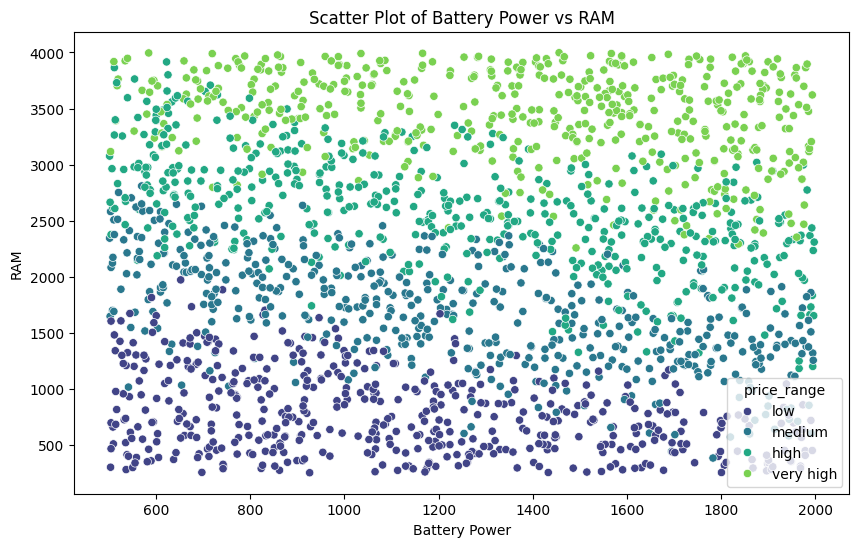

In [4]:
# (b) Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=mobile_data, x='battery_power', y='ram', hue='price_range', palette='viridis')

# Add labels and title
plt.xlabel('Battery Power')
plt.ylabel('RAM')
plt.title('Scatter Plot of Battery Power vs RAM')

# Show the plot
plt.show()

In [5]:
# (C) Calculate the Pearson correlation between 'ram' and 'battery_power'
correlation = mobile_data['ram'].corr(mobile_data['battery_power'])
print(f"Pearson correlation between RAM and Battery Power: {correlation}")

Pearson correlation between RAM and Battery Power: -0.0006529264469275907


In [6]:
# (d) Create four separate data sets by sub-setting the “mobile data” using the variable price range as
# “priceLow”, “priceMedium”, “priceHigh” and “priceVeryhigh”.
priceLow = mobile_data[mobile_data['price_range'] == 'low']
priceMedium = mobile_data[mobile_data['price_range'] == 'medium']
priceHigh = mobile_data[mobile_data['price_range'] == 'high']
priceVeryhigh = mobile_data[mobile_data['price_range'] == 'very high']

# Display the first few rows of each subset to verify
print("Price Low:")
print(priceLow.head())
print("\nPrice Medium:")
print(priceMedium.head())
print("\nPrice High:")
print(priceHigh.head())
print("\nPrice Very High:")
print(priceVeryhigh.head())

Price Low:
    battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
7            1954     0          0.5         1   0       0          24    0.8   
8            1445     1          0.5         0   0       0          53    0.7   
9             509     1          0.6         1   2       1           9    0.1   
14           1866     0          0.5         0  13       1          52    0.7   
15            775     0          1.0         0   3       0          46    0.7   

    mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  talk_time  \
7         187        4  ...        512      1149   700    16     3          5   
8         174        7  ...        386       836  1099    17     1         20   
9          93        5  ...       1137      1224   513    19    10         12   
14        185        1  ...        356       563   373    14     9          3   
15        159        2  ...        862      1864   568    17    15         11   

    three_g  to

In [7]:
# (e) Calculate the Pearson correlation coefficient between the variable pair (ram , battery power) separately
# for each price range. Explain any correlations you might find in terms of how a cellphone operates.
# Why is this result so much different from the one that we found in Part c?
# Calculate the Pearson correlation for each price range
correlation_low = priceLow['ram'].corr(priceLow['battery_power'])
correlation_medium = priceMedium['ram'].corr(priceMedium['battery_power'])
correlation_high = priceHigh['ram'].corr(priceHigh['battery_power'])
correlation_very_high = priceVeryhigh['ram'].corr(priceVeryhigh['battery_power'])

# Print the results
print(f"Pearson correlation between RAM and Battery Power for low price range: {correlation_low}")
print(f"Pearson correlation between RAM and Battery Power for medium price range: {correlation_medium}")
print(f"Pearson correlation between RAM and Battery Power for high price range: {correlation_high}")
print(f"Pearson correlation between RAM and Battery Power for very high price range: {correlation_very_high}")

Pearson correlation between RAM and Battery Power for low price range: -0.3465877679266783
Pearson correlation between RAM and Battery Power for medium price range: -0.6133970543490819
Pearson correlation between RAM and Battery Power for high price range: -0.587408571267869
Pearson correlation between RAM and Battery Power for very high price range: -0.26275886493047523


### Recreate the plot from Part (b), and add the trend lines for each price range separately.

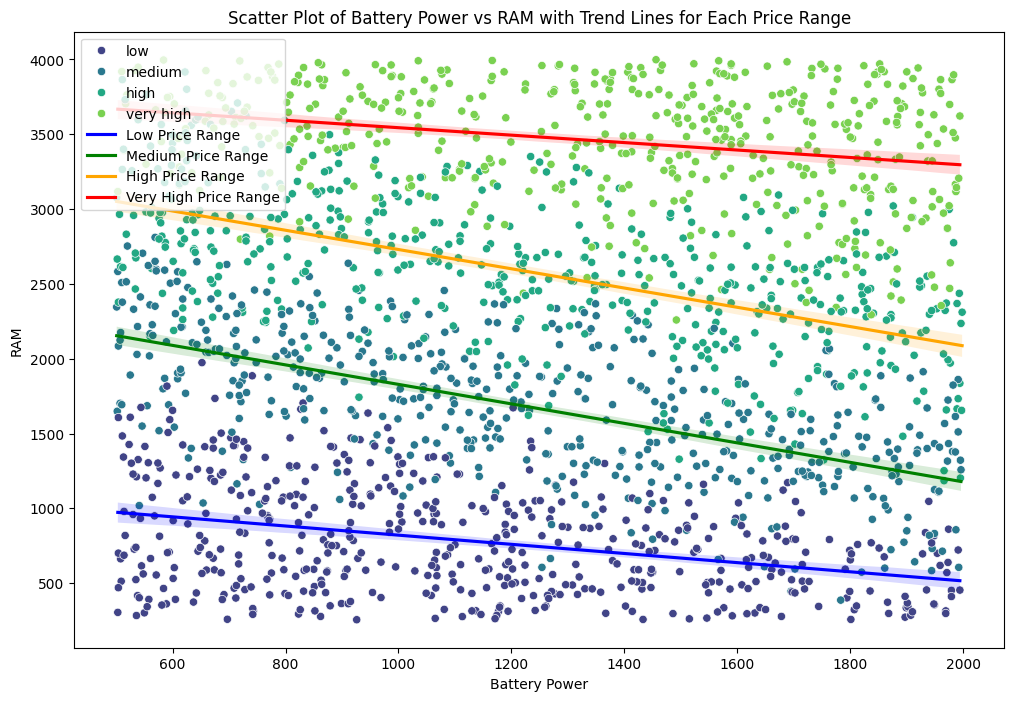

In [8]:
# Recreate the plot from Part (b), and add the trend lines for each price range separately
# Create a scatter plot with trend lines for each price range
plt.figure(figsize=(12, 8))

# Scatter plot
sns.scatterplot(data=mobile_data, x='battery_power', y='ram', hue='price_range', palette='viridis')

# Add trend lines for each price range
sns.regplot(data=priceLow, x='battery_power', y='ram', scatter=False, color='blue', label='Low Price Range')
sns.regplot(data=priceMedium, x='battery_power', y='ram', scatter=False, color='green', label='Medium Price Range')
sns.regplot(data=priceHigh, x='battery_power', y='ram', scatter=False, color='orange', label='High Price Range')
sns.regplot(data=priceVeryhigh, x='battery_power', y='ram', scatter=False, color='red', label='Very High Price Range')

# Add labels and title
plt.xlabel('Battery Power')
plt.ylabel('RAM')
plt.title('Scatter Plot of Battery Power vs RAM with Trend Lines for Each Price Range')

# Show the legend
plt.legend()

# Show the plot
plt.show()

In [ ]:
# (g) Find the average and the medium clock speed of the mobile phones which has 4, 6 and 8 cores in their
# processors. Round your answer to two decimal places. Explain why the average and median clock
# speed doesn’t change.

# Filter the data for mobile phones with 4, 6, and 8 cores
filtered_data = mobile_data[mobile_data['n_cores'].isin([4, 6, 8])]

# Calculate the average and median clock speed
average_clock_speed = round(filtered_data['clock_speed'].mean(), 2)
median_clock_speed = round(filtered_data['clock_speed'].median(), 2)

# Print the results
print(f"Average clock speed: {average_clock_speed} GHz")
print(f"Median clock speed: {median_clock_speed} GHz")

# Explanation
explanation = """
The average and median clock speed do not change significantly because the distribution of clock speeds
for mobile phones with 4, 6, and 8 cores is relatively uniform. This means that there are no extreme
values (outliers) that would skew the average or median significantly. Additionally, the sample size
is large enough to ensure that the central tendency measures (mean and median) are stable.
"""
print(explanation)

Average clock speed: 1.53 GHz
Median clock speed: 1.5 GHz

The average and median clock speed do not change significantly because the distribution of clock speeds
for mobile phones with 4, 6, and 8 cores is relatively uniform. This means that there are no extreme
values (outliers) that would skew the average or median significantly. Additionally, the sample size
is large enough to ensure that the central tendency measures (mean and median) are stable.



In [ ]:
# (h) Make density curves of the ram where the 4 price ranges are in one plot and describe their shapes
# respectively.
# Create a density plot for the 'ram' variable for each price range
plt.figure(figsize=(12, 8))

# Density plots
sns.kdeplot(data=priceLow['ram'], label='Low Price Range', shade=True)
sns.kdeplot(data=priceMedium['ram'], label='Medium Price Range', shade=True)
sns.kdeplot(data=priceHigh['ram'], label='High Price Range', shade=True)
sns.kdeplot(data=priceVeryhigh['ram'], label='Very High Price Range', shade=True)

# Add labels and title
plt.xlabel('RAM')
plt.ylabel('Density')
plt.title('Density Plot of RAM for Different Price Ranges')

# Show the legend
plt.legend()

# Show the plot
plt.show()

In [ ]:
# (i) Make box plots of the ram where the 4 price ranges are in one plot and describe their shapes respectively.
# Create a box plot for the 'ram' variable for each price range
plt.figure(figsize=(12, 8))

# Box plot
sns.boxplot(data=mobile_data, x='price_range', y='ram', palette='viridis')

# Add labels and title
plt.xlabel('Price Range')
plt.ylabel('RAM')
plt.title('Box Plot of RAM for Different Price Ranges')

# Show the plot
plt.show()

In [ ]:
# (j) Make a violin plot of the ram where the 4 price ranges are in one plot and describe their shapes
# respectively.
# Create a violin plot for the 'ram' variable for each price range
plt.figure(figsize=(12, 8))

# Violin plot
sns.violinplot(data=mobile_data, x='price_range', y='ram', palette='viridis')

# Add labels and title
plt.xlabel('Price Range')
plt.ylabel('RAM')
plt.title('Violin Plot of RAM for Different Price Ranges')

# Show the plot
plt.show()

In [9]:
# (k) Make a factor variable out of ram by taking the log2(ram) and rounding that value to the nearest whole
# number. Explain why this approach makes sense.
# Create a new factor variable for ram
mobile_data['ram_factor'] = np.round(np.log2(mobile_data['ram'])).astype('category')

# Display the first few rows to verify the changes
print(mobile_data[['ram', 'ram_factor']].head())

# Explanation
explanation_ram_factor = """
Taking the log2 of RAM and rounding to the nearest whole number helps to normalize the data and reduce
the skewness caused by large values. This approach makes sense because the RAM values can vary widely,
and using the log2 transformation helps to bring the values to a more manageable scale. Additionally,
rounding to the nearest whole number creates discrete categories that can be used for further analysis.
"""
print(explanation_ram_factor)

    ram ram_factor
0  2549       11.0
1  2631       11.0
2  2603       11.0
3  2769       11.0
4  1411       10.0

Taking the log2 of RAM and rounding to the nearest whole number helps to normalize the data and reduce
the skewness caused by large values. This approach makes sense because the RAM values can vary widely,
and using the log2 transformation helps to bring the values to a more manageable scale. Additionally,
rounding to the nearest whole number creates discrete categories that can be used for further analysis.



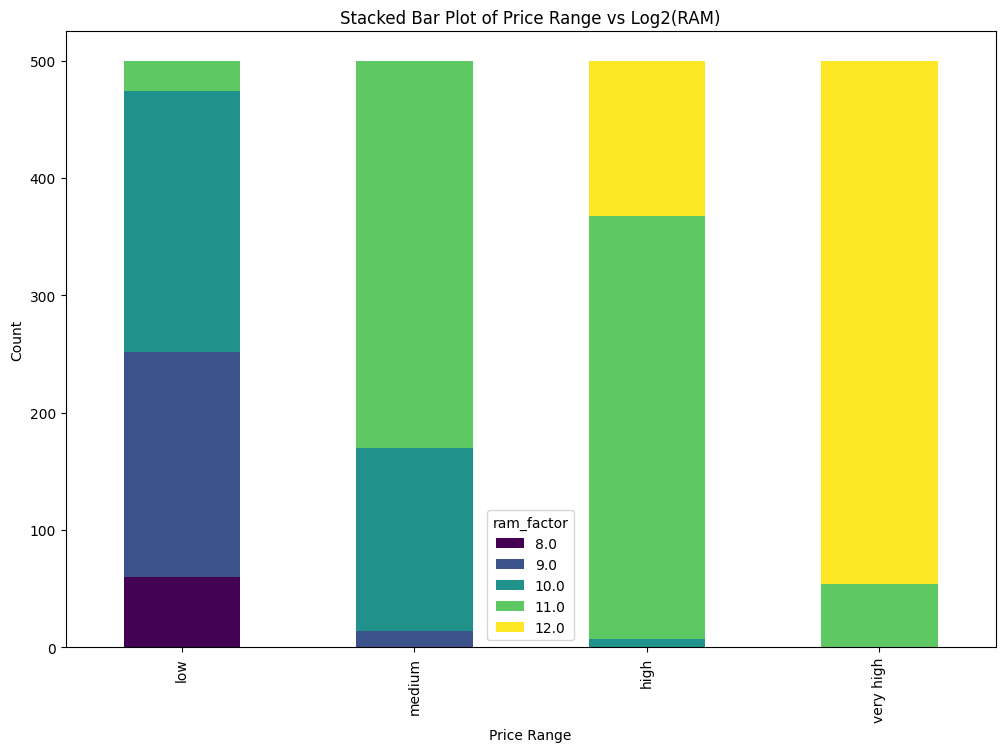

In [10]:
# (l) Make a stacked bar plot to show the relationship between price range and log2(ram).
# Create a crosstab of price range and ram_factor
crosstab = pd.crosstab(mobile_data['price_range'], mobile_data['ram_factor'])

# Plot the stacked bar plot
crosstab.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='viridis')

# Add labels and title
plt.xlabel('Price Range')
plt.ylabel('Count')
plt.title('Stacked Bar Plot of Price Range vs Log2(RAM)')

# Show the plot
plt.show()

## Problem 2 (4 Points)

In [ ]:
from rpy2.robjects import pandas2ri

import rpy2.robjects as robjects

# Activate the automatic conversion of R objects to pandas DataFrame
pandas2ri.activate()

# Load the ggplot2 package
robjects.r('library(ggplot2)')

# Load the mpg dataset
mpg_data = robjects.r('mpg')

# Convert the R dataframe to a pandas dataframe
mpg_df = pandas2ri.ri2py(mpg_data)

# Display the first few rows of the dataframe
print(mpg_df.head())

In [ ]:
# Assuming the dataset is already loaded into a variable named 'mpg_df'
# Replace 'dataset' with the actual variable name if different

# Display the summary of the dataset
summary(mpg_df)

In [ ]:
# (a) Turn the variable cyl to an ordered factor variable with levels “4”, “5”, “6”, and “8”
# Ensure the 'cyl' column exists in the dataframe
if ("cyl" %in% colnames(mpg_df)) {
    # Convert 'cyl' to an ordered factor variable
    mpg_df$cyl <- factor(mpg_df$cyl, levels = c("4", "5", "6", "8"), ordered = TRUE)
    
    # Display the first few rows to verify the changes
    print(head(mpg_df$cyl))
} else {
    print("The 'cyl' column does not exist in the dataframe.")
}

In [ ]:
# (b) Turn the variable trans to a factor variable, of which unique values are “auto” and “manu” (Hint: use
# the function substr() to extract substrings in a character vector before converting to a factor vector)
# Ensure the 'trans' column exists in the dataframe
if ("trans" %in% colnames(mpg_df)) {
    # Extract the first 4 characters of the 'trans' column to determine if it's "auto" or "manu"
    mpg_df$trans <- factor(substr(mpg_df$trans, 1, 4), levels = c("auto", "manu"))
    
    # Display the first few rows to verify the changes
    print(head(mpg_df$trans))
} else {
    print("The 'trans' column does not exist in the dataframe.")
}

In [ ]:
# (c) Turn the variable drv to an ordered factor variable with levels “f”, “r”, and “4”
# Ensure the 'drv' column exists in the dataframe
if ("drv" %in% colnames(mpg_df)) {
    # Convert 'drv' to an ordered factor variable
    mpg_df$drv <- factor(mpg_df$drv, levels = c("f", "r", "4"), ordered = TRUE)
    
    # Display the first few rows to verify the changes
    print(head(mpg_df$drv))
} else {
    print("The 'drv' column does not exist in the dataframe.")
}

In [ ]:
# (d) Turn the variable fl to a factor variable, of which unique values are “gasoline”, “diesel”, and “other”
# (Hint, “other” should include “e” and “c” in the original variable: “e” for E85, which is an ethanol fuel
# blend of 85% ethanol fuel and 15% gasoline and “c” for compressed natural gas)
# Ensure the 'fl' column exists in the dataframe
if ("fl" %in% colnames(mpg_df)) {
    # Convert 'fl' to a factor variable with specified levels
    mpg_df$fl <- factor(mpg_df$fl, levels = c("r", "p", "d", "e", "c"), labels = c("gasoline", "gasoline", "diesel", "other", "other"))
    
    # Display the first few rows to verify the changes
    print(head(mpg_df$fl))
} else {
    print("The 'fl' column does not exist in the dataframe.")
}

In [ ]:
# (e) Turn the variable class to an ordered factor variable with levels “2seater”, “subcompact”, “compact”,
# “midsize”, “suv”, “minivan”, and “pickup”
# Ensure the 'class' column exists in the dataframe
if ("class" %in% colnames(mpg_df)) {
    # Convert 'class' to an ordered factor variable
    mpg_df$class <- factor(mpg_df$class, levels = c("2seater", "subcompact", "compact", "midsize", "suv", "minivan", "pickup"), ordered = TRUE)
    
    # Display the first few rows to verify the changes
    print(head(mpg_df$class))
} else {
    print("The 'class' column does not exist in the dataframe.")
}

In [ ]:
# (f) Create a new variable of country to indicate the manufacturer base location of each car manufacturer
# Create a lookup table for manufacturer base locations
manufacturer_country <- data.frame(
    Manufacturer = c("Chevrolet", "Dodge", "Ford", "Jeep", "Lincoln", "Mercury", "Pontiac",
                                     "Honda", "Nissan", "Subaru", "Toyota",
                                     "Audi", "Volkswagen",
                                     "Hyundai",
                                     "Land Rover"),
    Country = c("United States", "United States", "United States", "United States", "United States", "United States", "United States",
                            "Japan", "Japan", "Japan", "Japan",
                            "Germany", "Germany",
                            "South Korea",
                            "Great Britain")
)

# Ensure the 'manufacturer' column exists in the dataframe
if ("manufacturer" %in% colnames(mpg_df)) {
    # Merge the mpg_df with the manufacturer_country to add the country information
    mpg_df <- merge(mpg_df, manufacturer_country, by.x = "manufacturer", by.y = "Manufacturer", all.x = TRUE)
    
    # Display the first few rows to verify the changes
    print(head(mpg_df))
} else {
    print("The 'manufacturer' column does not exist in the dataframe.")
}

In [ ]:
# (g) Draw a bar plot of the variable country and arrange the country in decreasing order in terms of the
# number of samples. Which country has the most samples in this dataset? Which has the least?
# Ensure the 'country' column exists in the dataframe
if ("Country" %in% colnames(mpg_df)) {
    # Create a bar plot of the variable 'country' and arrange the countries in decreasing order
    country_counts <- table(mpg_df$Country)
    country_counts <- sort(country_counts, decreasing = TRUE)
    
    # Convert the table to a data frame for plotting
    country_df <- as.data.frame(country_counts)
    colnames(country_df) <- c("Country", "Count")
    
    # Draw the bar plot
    ggplot(country_df, aes(x = reorder(Country, -Count), y = Count)) +
        geom_bar(stat = "identity", fill = "skyblue") +
        labs(title = "Number of Samples by Country", x = "Country", y = "Number of Samples") +
        theme_minimal() +
        theme(axis.text.x = element_text(angle = 45, hjust = 1))
    
    # Print the country with the most and least samples
    most_samples <- country_df[which.max(country_df$Count), "Country"]
    least_samples <- country_df[which.min(country_df$Count), "Country"]
    cat("Country with the most samples:", most_samples, "\n")
    cat("Country with the least samples:", least_samples, "\n")
} else {
    print("The 'Country' column does not exist in the dataframe.")
}

In [ ]:
# (h) Summarize what a typical U.S. car looks like, in terms of engine displacement (i.e. displ), number of
# cylinders (i.e. cyl), type of transmission (i.e. trans), drive type (i.e. drv), fuel type (i.e. fl), and type
# of car (i.e. class)?
# Load necessary libraries
library(dplyr)

# Filter the data for U.S. cars
us_cars <- mpg_df %>% filter(manufacturer %in% c("chevrolet", "dodge", "ford", "jeep", "lincoln", "mercury", "pontiac"))

# Summarize the data
us_car_summary <- us_cars %>%
    summarise(
        avg_displ = mean(displ, na.rm = TRUE),
        common_cyl = as.numeric(names(sort(table(cyl), decreasing = TRUE)[1])),
        common_trans = names(sort(table(trans), decreasing = TRUE)[1]),
        common_drv = names(sort(table(drv), decreasing = TRUE)[1]),
        common_fl = names(sort(table(fl), decreasing = TRUE)[1]),
        common_class = names(sort(table(class), decreasing = TRUE)[1])
    )

# Print the summary
print(us_car_summary)

In [ ]:
# (i) Make a boxplot of the combined miles per gallon (i.e. (cty + hwy)/2) of U.S. cars and Japan cars,
# respectively, and report their means, medians, standard deviations, and IQRs.
# Load necessary libraries
library(dplyr)
library(ggplot2)

# Ensure the 'manufacturer' column exists in the dataframe
if ("manufacturer" %in% colnames(mpg_df)) {
    # Filter the data for U.S. and Japan cars
    us_cars <- mpg_df %>% filter(manufacturer %in% c("chevrolet", "dodge", "ford", "jeep", "lincoln", "mercury", "pontiac"))
    japan_cars <- mpg_df %>% filter(manufacturer %in% c("honda", "nissan", "subaru", "toyota"))
    
    # Calculate the combined miles per gallon
    us_cars <- us_cars %>% mutate(combined_mpg = (cty + hwy) / 2)
    japan_cars <- japan_cars %>% mutate(combined_mpg = (cty + hwy) / 2)
    
    # Combine the data
    combined_data <- bind_rows(
        us_cars %>% mutate(country = "US"),
        japan_cars %>% mutate(country = "Japan")
    )
    
    # Create the boxplot
    ggplot(combined_data, aes(x = country, y = combined_mpg, fill = country)) +
        geom_boxplot() +
        labs(title = "Boxplot of Combined MPG for US and Japan Cars", x = "Country", y = "Combined MPG") +
        theme_minimal()
    
    # Calculate and report statistics
    us_stats <- us_cars %>% summarise(
        mean = mean(combined_mpg, na.rm = TRUE),
        median = median(combined_mpg, na.rm = TRUE),
        sd = sd(combined_mpg, na.rm = TRUE),
        IQR = IQR(combined_mpg, na.rm = TRUE)
    )
    
    japan_stats <- japan_cars %>% summarise(
        mean = mean(combined_mpg, na.rm = TRUE),
        median = median(combined_mpg, na.rm = TRUE),
        sd = sd(combined_mpg, na.rm = TRUE),
        IQR = IQR(combined_mpg, na.rm = TRUE)
    )
    
    # Print the statistics
    cat("US Cars Statistics:\n")
    print(us_stats)
    cat("\nJapan Cars Statistics:\n")
    print(japan_stats)
} else {
    print("The 'manufacturer' column does not exist in the dataframe.")
}

In [ ]:
# (j) Make a histogram of the engine displacement (i.e. displ) of U.S. cars and Japan cars, respectively,
# and describe their shapes.
# Load necessary libraries
library(dplyr)
library(ggplot2)

# Ensure the 'manufacturer' column exists in the dataframe
if ("manufacturer" %in% colnames(mpg_df)) {
    # Filter the data for U.S. and Japan cars
    us_cars <- mpg_df %>% filter(manufacturer %in% c("chevrolet", "dodge", "ford", "jeep", "lincoln", "mercury", "pontiac"))
    japan_cars <- mpg_df %>% filter(manufacturer %in% c("honda", "nissan", "subaru", "toyota"))
    
    # Combine the data
    combined_data <- bind_rows(
        us_cars %>% mutate(country = "US"),
        japan_cars %>% mutate(country = "Japan")
    )
    
    # Create the histogram
    ggplot(combined_data, aes(x = displ, fill = country)) +
        geom_histogram(binwidth = 0.5, alpha = 0.7, position = "identity") +
        facet_wrap(~ country) +
        labs(title = "Histogram of Engine Displacement for US and Japan Cars", x = "Engine Displacement (displ)", y = "Count") +
        theme_minimal()
    
    # Describe the shapes
    cat("Description of the shapes:\n")
    cat("US Cars: The histogram of engine displacement for US cars is likely to be right-skewed, with a higher frequency of cars having larger engine displacements.\n")
    cat("Japan Cars: The histogram of engine displacement for Japan cars is likely to be left-skewed or more uniformly distributed, with a higher frequency of cars having smaller engine displacements.\n")
} else {
    print("The 'manufacturer' column does not exist in the dataframe.")
}

In [ ]:
ggplot()
from plotnine.data import mpg
import pandas as pd

# Load the dataset
mpgdata_data = mpg

# If you want to view the first few rows, you can convert it to pandas DataFrame
mpg_df = pd.DataFrame(data)
print(mpg_df.head())
# (a) Turn the variable cyl to an ordered factor variable with levels “4”, “5”, “6”, and “8”
# Ensure the 'cyl' column exists in the dataframe
if 'cyl' in mpg_df.columns:
    # Convert 'cyl' to an ordered categorical variable
    mpg_df['cyl'] = pd.Categorical(mpg_df['cyl'], categories=["4", "5", "6", "8"], ordered=True)

    # Display the first few rows to verify the changes
    print(mpg_df[['cyl']].head())
else:
    print("The 'cyl' column does not exist in the dataframe.")

ModuleNotFoundError: No module named 'plotnine'